In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [53]:
df = pd.read_csv('/content/Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [54]:
df.shape

(10999, 12)

In [55]:
df.dtypes

,0
ID,int64
Warehouse_block,object
Mode_of_Shipment,object
Customer_care_calls,int64
Customer_rating,int64
Cost_of_the_Product,int64
Prior_purchases,int64
Product_importance,object
Gender,object
Discount_offered,int64


In [56]:
df.drop(['ID'], axis=1, inplace=True)


In [57]:
df.isnull().sum()

,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0
Weight_in_gms,0


In [58]:
df.duplicated().sum()

0

In [59]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [60]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


Text(0.5, 1.0, 'Gender Distribution')

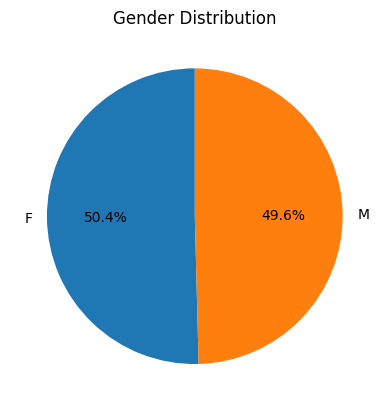

In [61]:
plt.pie(df['Gender'].value_counts(),labels = ['F','M'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

In [62]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

Text(0.5, 1.0, 'Cost of the Product')

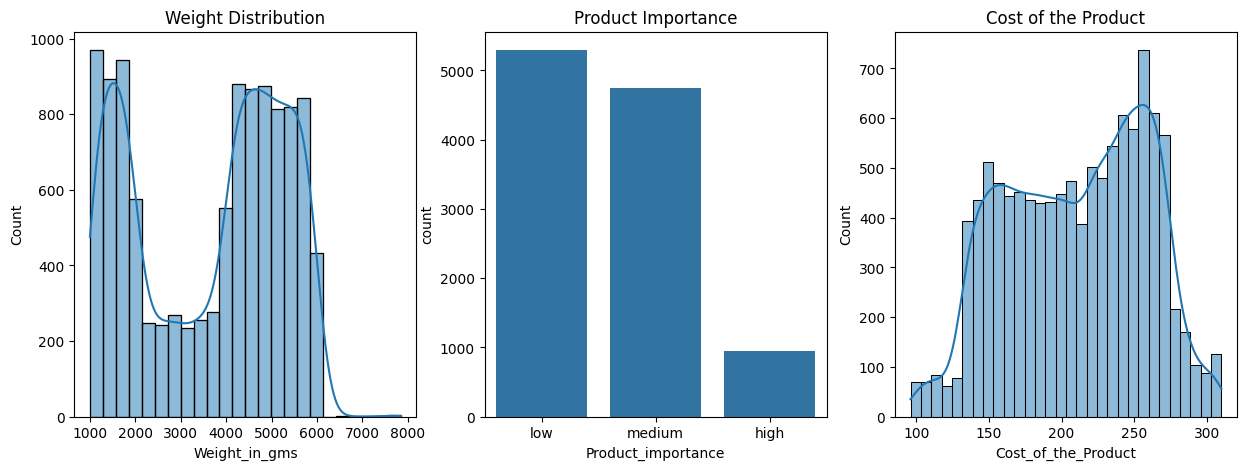

In [63]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1]).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')


Text(0.5, 1.0, 'Reached on Time')

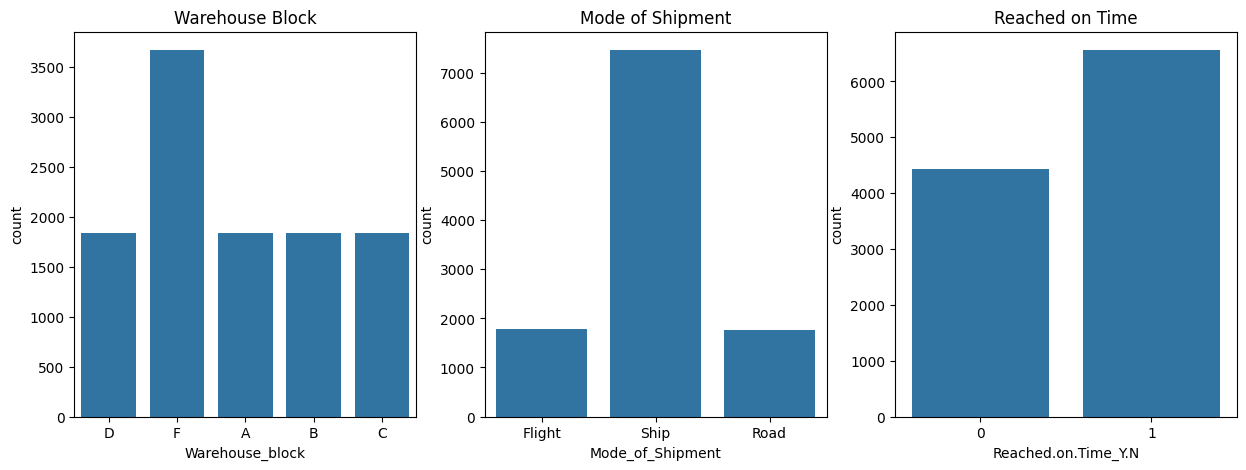

In [64]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0]).set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1]).set_title('Mode of Shipment')
sns.countplot(x = 'Reached.on.Time_Y.N', data = df, ax=ax[2]).set_title('Reached on Time')



Text(0.5, 1.0, 'Discount Offered')

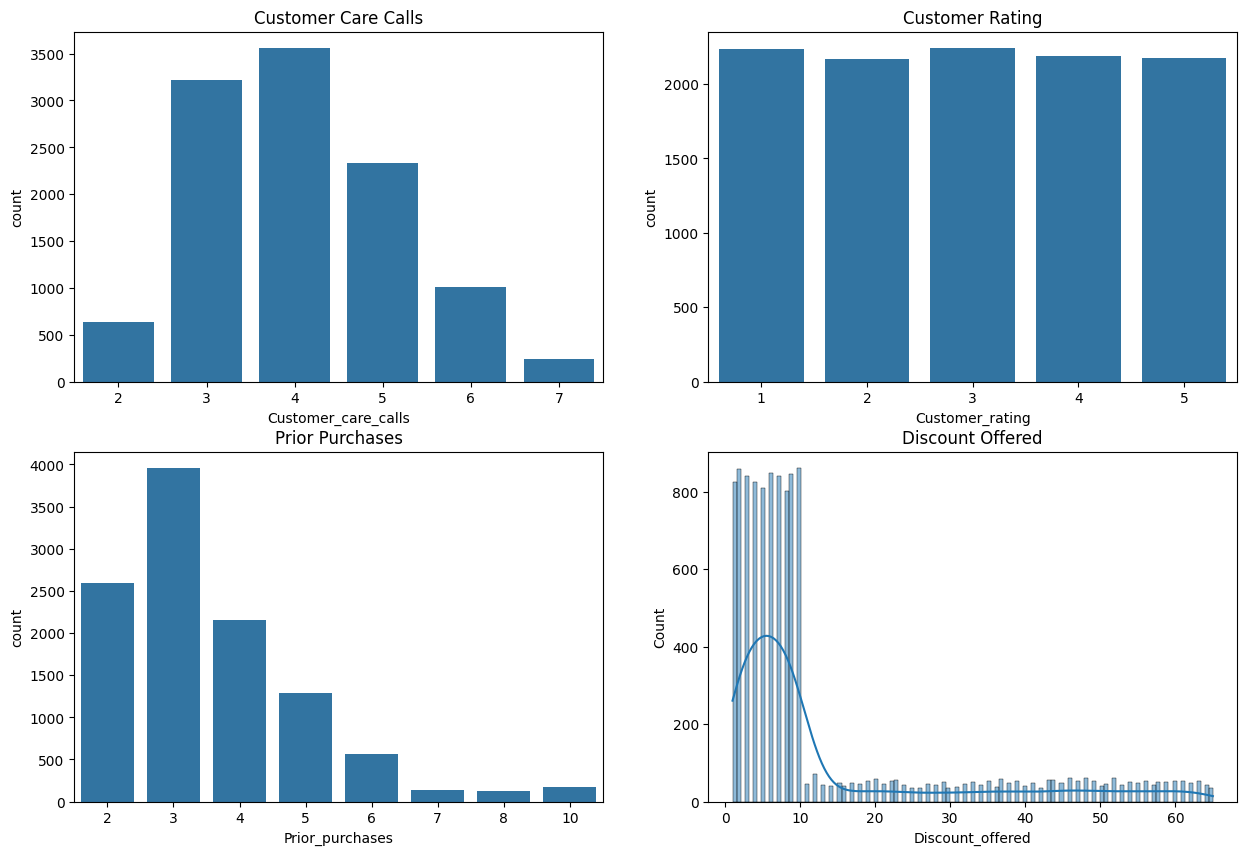

In [65]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0]).set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1]).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0]).set_title('Prior Purchases')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')

Text(0.5, 1.0, 'Gender vs Reached on Time')

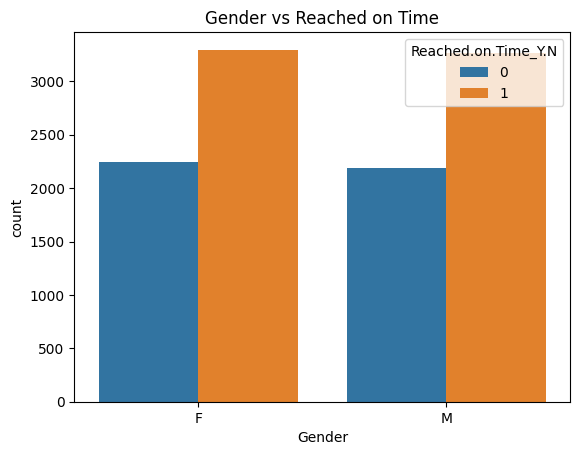

In [66]:
sns.countplot(x = 'Gender', data = df, hue = 'Reached.on.Time_Y.N').set_title('Gender vs Reached on Time')

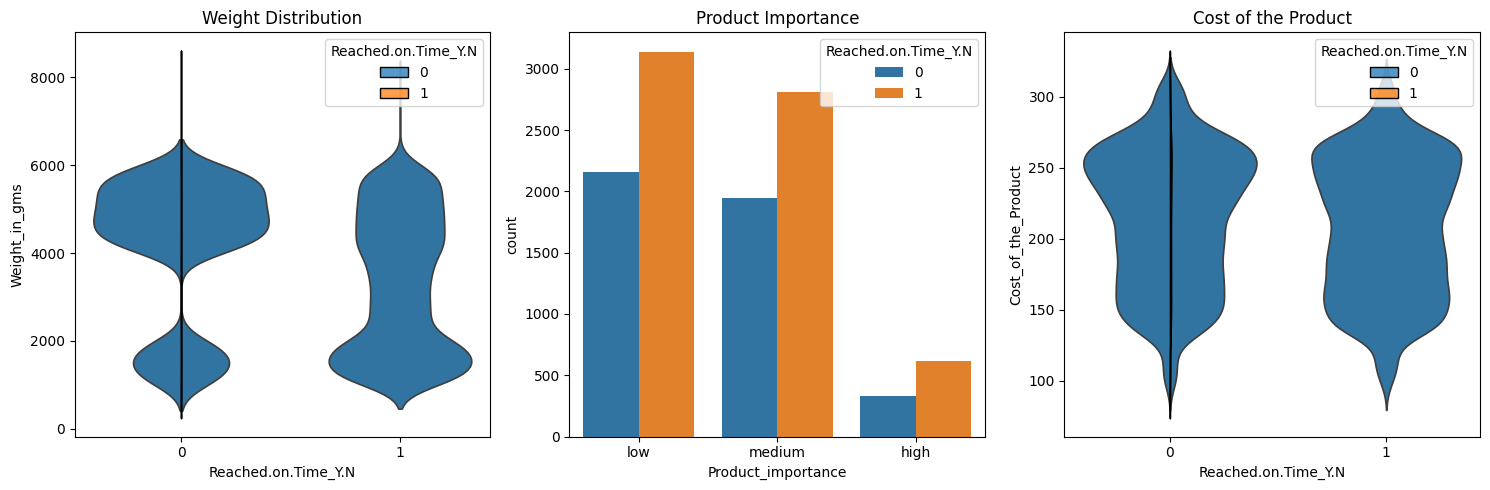

In [67]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Weight Distribution
sns.violinplot(y=df['Weight_in_gms'], ax=ax[0], inner=None, x=df['Reached.on.Time_Y.N']).set_title('Weight Distribution')
sns.kdeplot(y=df['Weight_in_gms'], ax=ax[0], hue=df['Reached.on.Time_Y.N'], multiple="stack")

# Product Importance
sns.countplot(x='Product_importance', data=df, ax=ax[1], hue='Reached.on.Time_Y.N').set_title('Product Importance')

# Cost of the Product
sns.violinplot(y=df['Cost_of_the_Product'], ax=ax[2], inner=None, x=df['Reached.on.Time_Y.N']).set_title('Cost of the Product')
sns.kdeplot(y=df['Cost_of_the_Product'], ax=ax[2], hue=df['Reached.on.Time_Y.N'], multiple="stack")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Mode of Shipment')

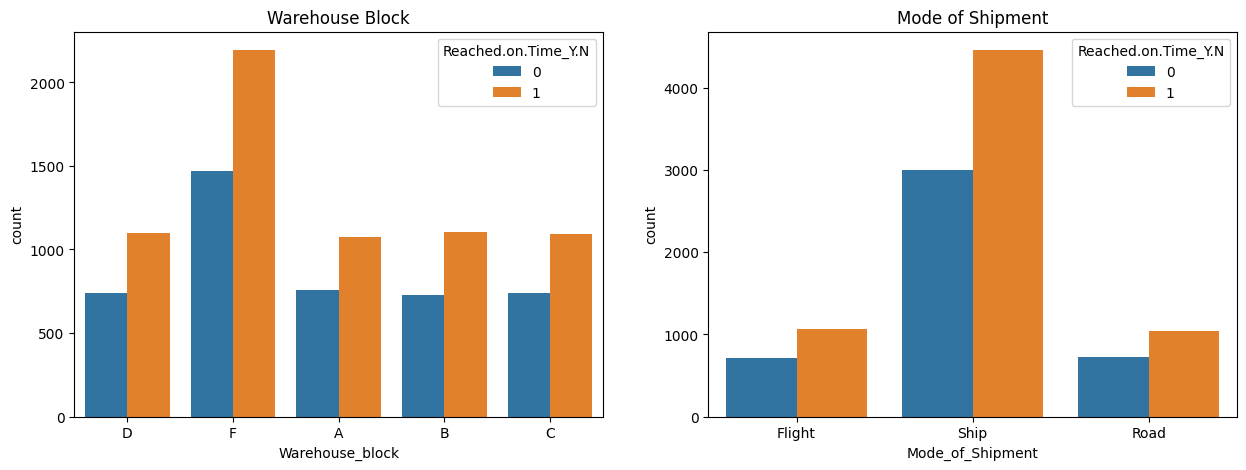

In [68]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0], hue = 'Reached.on.Time_Y.N').set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Mode of Shipment')

Text(0.5, 1.0, 'Discount Offered')

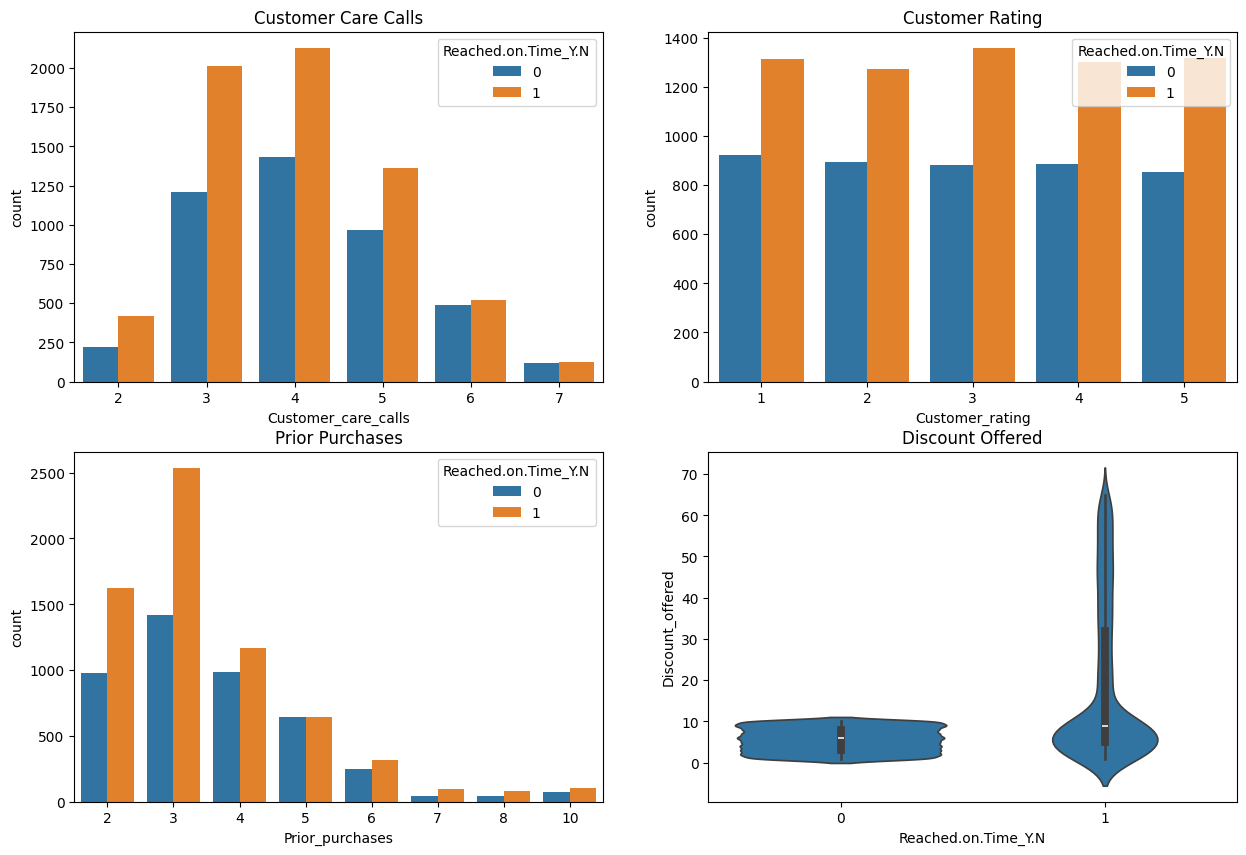

In [69]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purchases')
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = df, ax=ax[1,1]).set_title('Discount Offered')